In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('data.csv') #.drop(['Unnamed: 0.1', 'Unnamed: 0'])

num_cols = ['Drug_dose', 
            'NP_concentration', 'NP size_min', 'NP size_max', 'NP size_avg', 
            'ZOI_drug', 'ZOI_NP', 'ZOI_drug_NP', 
            'fold_increase_in_antibacterial_activity (%)']

cat_cols = ['Bacteria', 'NP_Synthesis', 'Drug',	'Drug_class_drug_bank', 'shape', 'method', 'MDR_check']

df

,Unnamed: 0.1,Unnamed: 0,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check
0,0,86,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.00,spherical,MIC,32+,6.3,32+,NaN,1
1,1,87,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.00,spherical,MIC,32+,6.3,32+,NaN,1
2,2,679,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.00,spherical,MIC,32+,25,32+,NaN,1
3,3,680,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,15.0,30.0,28.00,spherical,MIC,32+,25,32+,NaN,1
4,4,638,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Vancomycin,Carboxylic acids and derivatives,30.0,100,5.0,30.0,21.00,spherical,disc_diffusion,0,14,17+2,7.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,836,Staphylococcus aureus,green_synthesis using C. zylinicum aqueous ext...,NaN,NaN,NaN,NaN,10.0,78.9,44.45,spherical,MIC,NaN,4.5,NaN,NaN,0
879,879,837,Acinetobacter baumanii,green_synthesis using C. zylinicum aqueous ext...,NaN,NaN,NaN,NaN,10.0,78.9,44.45,spherical,MIC,NaN,5.7,NaN,NaN,0
880,880,880,Enterococcus faecalis,green_synthesis using extract of Klebsiella pn...,NaN,NaN,NaN,10,20.0,20.0,20.00,spherical,disc_diffusion,NaN,10,NaN,NaN,0
881,881,881,Enterococcus faecalis,green_synthesis using extract of Klebsiella pn...,NaN,NaN,NaN,20,20.0,20.0,20.00,spherical,disc_diffusion,NaN,18,NaN,NaN,0


# Numerical features

In [3]:
df['ZOI_drug'] = df['ZOI_drug'].replace('32+', '32').astype('float64')
df['ZOI_drug'].unique()

array([3.200e+01, 0.000e+00, 1.200e+01, 5.000e+02, 2.200e+01, 4.600e+01,
       4.800e+01, 4.700e+01, 4.400e+01, 3.000e+01, 2.800e+01, 2.700e+01,
       4.000e+01, 2.300e+01, 2.500e+01, 3.400e+01, 2.600e+01, 3.700e+01,
       2.900e+01, 3.600e+01, 2.000e+01, 2.100e+01, 2.400e+01, 3.100e+01,
       1.000e+03, 2.500e+02, 8.000e+00, 1.400e+01, 1.700e+01, 1.800e+01,
       7.000e+00, 3.300e+01, 2.070e+01, 1.500e+01, 1.900e+01, 2.800e+00,
       1.100e+01, 1.300e+01, 1.600e+01, 1.730e+01, 1.850e+01, 9.000e+00,
       1.000e+01, 6.400e+01,       nan, 7.500e+00, 4.600e-01, 4.000e+00,
       1.000e+00, 2.000e+00, 1.250e+02, 1.250e+00, 6.250e-01, 3.125e-01,
       2.500e-01, 3.000e-02, 2.500e+00, 1.000e-02, 5.000e-02, 1.000e-01,
       5.000e-01, 7.500e-01, 1.280e+02])

In [4]:
df['ZOI_NP'] = df['ZOI_NP'].replace('50+', '50').astype('float64')
df['ZOI_NP'].unique()

array([6.300e+00, 2.500e+01, 1.400e+01,       nan, 1.500e+01, 1.300e+01,
       6.400e+01, 1.200e+01, 1.600e+01, 1.700e+01, 2.000e+01, 1.350e+01,
       2.100e+01, 1.900e+01, 1.000e+01, 2.400e+01, 1.800e+01, 2.200e+01,
       3.200e+01, 5.000e+01, 8.000e+00, 1.250e+01, 1.000e+02, 2.500e+00,
       5.000e+00, 4.000e+00, 1.100e+01, 5.000e-01, 2.500e-01, 2.000e+00,
       1.280e+02, 3.100e-01, 9.000e-02, 4.700e-01, 6.000e+01, 1.600e+02,
       1.800e+02, 2.200e+02, 4.000e+01, 1.200e+02, 1.400e+02, 0.000e+00,
       2.600e+01, 2.700e+01, 7.000e+00, 9.000e+00, 1.460e+01, 1.560e+01,
       1.730e+01, 2.030e+01, 7.800e+00, 8.100e+00, 9.800e+00, 3.000e+01,
       3.500e+01, 6.500e+01, 8.000e+01, 2.060e+01, 2.660e+01, 1.040e+00,
       2.000e-02, 4.000e+03, 1.055e+01, 1.122e+01, 1.139e+01, 1.157e+01,
       9.260e+00, 1.430e+01, 1.530e+01, 2.800e+00, 3.100e+00, 4.500e+00,
       5.700e+00, 2.300e+01])

In [5]:
df['ZOI_drug_NP'] = df['ZOI_drug_NP'].replace({'32+': '32', '17+2': '17'}).astype('float64')
df['ZOI_drug_NP'].unique()

array([3.200e+01, 1.700e+01, 1.500e+01, 6.250e+01, 5.000e+01, 4.800e+01,
       4.700e+01, 4.400e+01, 4.200e+01, 4.100e+01, 4.000e+01, 3.900e+01,
       3.800e+01, 3.700e+01, 3.600e+01, 3.500e+01, 3.400e+01, 3.125e+01,
       3.100e+01, 3.000e+01, 2.900e+01, 2.800e+01, 2.700e+01, 2.600e+01,
       2.500e+01, 2.400e+01, 2.300e+01, 2.200e+01, 2.150e+01, 2.100e+01,
       2.080e+01, 2.000e+01, 1.990e+01, 1.900e+01, 1.850e+01, 1.800e+01,
       1.600e+01, 1.530e+01, 1.475e+01, 1.433e+01, 1.400e+01, 1.300e+01,
       1.288e+01, 1.280e+01, 1.276e+01, 1.257e+01, 1.245e+01, 1.200e+01,
       1.167e+01, 1.164e+01, 1.145e+01, 1.143e+01, 1.100e+01, 1.098e+01,
       1.062e+01, 1.034e+01, 1.000e+01, 9.740e+00, 9.000e+00, 8.000e+00,
       7.810e+00, 7.000e+00, 4.800e+00, 4.000e+00, 2.000e+00, 1.750e+00,
       1.000e+00, 9.700e-01, 8.000e-01, 6.000e-01, 5.000e-01, 4.000e-01,
       3.000e-01, 2.500e-01, 1.250e-01, 1.000e-01, 3.000e-02, 0.000e+00,
             nan])

### Проводилось по 3 экспа с разной конц. НЧ, и при этом все результаты в БД уже усредненные, поэтому добавим столбец "проверено для разных конц"

In [6]:
df['NP_concentration'].unique()


array([nan, '100', '30', '170/85/42.5', '170/85/42.33', '170/85/42.15',
       '170/85/42.24', '170/85/42.20', '170/85/42.11', '10',
       '170/85/42.27', '170/85/42.13', '170/85/42.34', '170/85/42.8',
       '170/85/42.32', '170/85/42.23', '170/85/42.12', '170/85/42.25',
       '170/85/42.10', '170/85/42.29', '170/85/42.26', '170/85/42.28',
       '170/85/42.16', '170/85/42.6', '170/85/42.31', '170/85/42.9',
       '170/85/42.19', '170/85/42.18', '170/85/42.30', '170/85/42.17',
       '170/85/42.21', '170/85/42.14', '20', '170/85/42.7',
       '170/85/42.22', '50', '25', '102', '104', '170', '85', '42.5',
       '21.25', '10.625', '2.65', '1.33', '0.66', '0.31', '1000', '500',
       '300'], dtype=object)

In [7]:
df[df['NP_concentration'] == '170/85/42.29']

,Unnamed: 0.1,Unnamed: 0,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check
73,73,126,Salmonella enterica,green_synthesis using Ulva fasciata,Neomycin,NC,30.0,170/85/42.29,14.45,15.55,15.0,spherical,disc_diffusion,14.0,NaN,28.0,NaN,0


In [8]:
df['various_conc_tested'] = np.array(['/' in str(x) for x in df['NP_concentration']])
df.loc[df['various_conc_tested'] == True, 'NP_concentration'] = 170
df['various_conc_tested'].value_counts()

False    853
True      30
Name: various_conc_tested, dtype: int64

In [9]:
df[num_cols] = df[num_cols].astype('float64')

In [10]:
df[num_cols].dtypes

Drug_dose                                      float64
NP_concentration                               float64
NP size_min                                    float64
NP size_max                                    float64
NP size_avg                                    float64
ZOI_drug                                       float64
ZOI_NP                                         float64
ZOI_drug_NP                                    float64
fold_increase_in_antibacterial_activity (%)    float64
dtype: object

# Распределения числовых фич

Куча нанов, пока ничего хорошего не сделаем

<Axes: xlabel='ZOI_drug_NP', ylabel='Probability'>

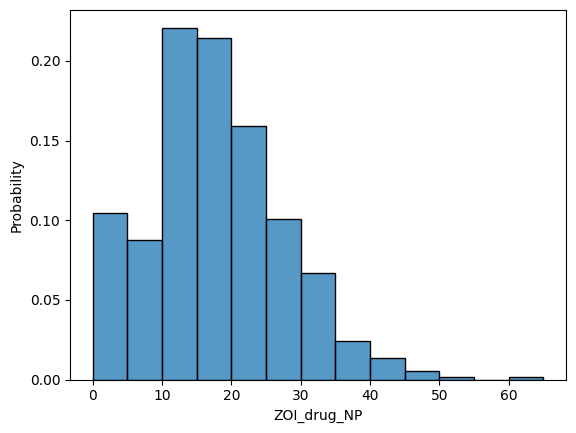

In [11]:
sns.histplot(df['ZOI_drug_NP'].dropna(), stat='probability', binwidth=5)

# Cat features


Стрип, чистим от технических проблем

In [12]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
for i in cat_cols:
    print(i, ':\n', sorted(df[i].dropna().unique().tolist()),'\n')

Bacteria :
 ['Acinetobacter baumanii', 'Actinobacillus pleuropneumoniae', 'Bacillus cereus', 'Bacillus spp.', 'Bacillus subtilis', 'Candida albicans', 'Candida glabrata', 'Candida glochares', 'Candida saitoana', 'Enterobacter cloacae', 'Enterococcus faecalis', 'Enterococcus faecium', 'Escherichia coli', 'Haemophilus influenzae', 'Klebsiella pneumoniae', 'Klebsiella sp.', 'Listeria monocytogenes', 'Micrococcus luteus', 'Neisseria mucosa', 'Pasteurella Multocida', 'Proteus mirabilis', 'Proteus sp.', 'Proteus vulgaris', 'Pseudomonas aeruginosa', 'Pseudomonas koreensis', 'Salmonella  typhi', 'Salmonella Paratyphi', 'Salmonella enterica', 'Salmonella typhimurium', 'Serratia marcescens', 'Serratia odorifera', 'Staphylococcus aureus', 'Staphylococcus epidermidis', 'Streptococcus mutans', 'Streptococcus pneumoniae', 'Streptococcus uberis', 'Vibrio cholerae', 'Vibrio parahaemolyticus'] 

NP_Synthesis :
 ['chem_synthesis', 'chem_synthesis (purchased from Vector Vita Ltd, Novosibirsk, Russia', 'c

Ищем проблемы в строковых фичах:

1) Bacteria: Bacillus spp. - это Bacillus subtilis
2) NP_Synthesis: куча лишней инфы, скорее всего окажется важным зеленый/химический синтез, и то не факт
3) Drug: некоторые написаны с маленькой буквы
4) Drug_class_drug_bank: есть два drug'a, которые отнесены к двум классам сразу. Посмотрели глазами, решили, что можно оставить один класс, потеряем не много

In [14]:
df['Bacteria'] = df['Bacteria'].replace({'Bacillus spp.': 'Bacillus subtilis'})

In [15]:
df['NP_Synthesis'] = df['NP_Synthesis'].replace({'chem_synthesis.*': 'chem_synthesis', 
                                                 'chemical_synthesis.*': 'chem_synthesis',
                                                 'green_synthesis.*': 'green_synthesis'}, regex=True)

In [16]:
df['Drug'] = df['Drug'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [17]:
print(df[df['Drug_class_drug_bank'] == 'Benzene and substituted derivatives; Phenol ethers'])
df['Drug_class_drug_bank'] = df['Drug_class_drug_bank'].replace('Benzene and substituted derivatives; Phenol ethers', 'Benzene and substituted derivatives')

    Unnamed: 0.1  Unnamed: 0               Bacteria     NP_Synthesis  \
26            26         708       Escherichia coli  green_synthesis   
31            31         707  Staphylococcus aureus  green_synthesis   

              Drug                               Drug_class_drug_bank  \
26  co-trimoxazole  Benzene and substituted derivatives; Phenol et...   
31  co-trimoxazole  Benzene and substituted derivatives; Phenol et...   

    Drug_dose  NP_concentration  NP size_min  NP size_max  NP size_avg  \
26        2.0              10.0          5.0         32.0         22.5   
31        2.0              10.0          5.0         32.0         22.5   

        shape          method  ZOI_drug  ZOI_NP  ZOI_drug_NP  \
26  spherical  disc_diffusion      37.0     NaN         37.0   
31  spherical  disc_diffusion      36.0     NaN         36.0   

    fold_increase_in_antibacterial_activity (%)  MDR_check  \
26                                          0.0          0   
31                     

In [18]:
for i in cat_cols:
    print(i, ':\n', sorted(df[i].dropna().unique().tolist()),'\n', len(sorted(df[i].dropna().unique().tolist())))

Bacteria :
 ['Acinetobacter baumanii', 'Actinobacillus pleuropneumoniae', 'Bacillus cereus', 'Bacillus subtilis', 'Candida albicans', 'Candida glabrata', 'Candida glochares', 'Candida saitoana', 'Enterobacter cloacae', 'Enterococcus faecalis', 'Enterococcus faecium', 'Escherichia coli', 'Haemophilus influenzae', 'Klebsiella pneumoniae', 'Klebsiella sp.', 'Listeria monocytogenes', 'Micrococcus luteus', 'Neisseria mucosa', 'Pasteurella Multocida', 'Proteus mirabilis', 'Proteus sp.', 'Proteus vulgaris', 'Pseudomonas aeruginosa', 'Pseudomonas koreensis', 'Salmonella  typhi', 'Salmonella Paratyphi', 'Salmonella enterica', 'Salmonella typhimurium', 'Serratia marcescens', 'Serratia odorifera', 'Staphylococcus aureus', 'Staphylococcus epidermidis', 'Streptococcus mutans', 'Streptococcus pneumoniae', 'Streptococcus uberis', 'Vibrio cholerae', 'Vibrio parahaemolyticus'] 
 37
NP_Synthesis :
 ['chem_synthesis', 'green_synthesis'] 
 2
Drug :
 ['amikacin', 'amoxicillin', 'amphotericin b', 'ampicilli

# Избавляемся от нанов

In [19]:
for col in df:
    print(f'{col} - nans: {df[col].isna().sum()}')

Unnamed: 0.1 - nans: 0
Unnamed: 0 - nans: 0
Bacteria - nans: 0
NP_Synthesis - nans: 0
Drug - nans: 241
Drug_class_drug_bank - nans: 241
Drug_dose - nans: 306
NP_concentration - nans: 250
NP size_min - nans: 0
NP size_max - nans: 0
NP size_avg - nans: 0
shape - nans: 0
method - nans: 0
ZOI_drug - nans: 256
ZOI_NP - nans: 442
ZOI_drug_NP - nans: 299
fold_increase_in_antibacterial_activity (%) - nans: 462
MDR_check - nans: 0
various_conc_tested - nans: 0


```ZOI_drug_NP```: target, вынуждены выбросить, остается 584 сэмпла

In [20]:
df = df[~df['ZOI_drug_NP'].isna()]

In [21]:
for col in df:
    print(f'{col} - nans: {df[col].isna().sum()}')
print('--------------\nRows:', df.shape[0])

Unnamed: 0.1 - nans: 0
Unnamed: 0 - nans: 0
Bacteria - nans: 0
NP_Synthesis - nans: 0
Drug - nans: 0
Drug_class_drug_bank - nans: 0
Drug_dose - nans: 119
NP_concentration - nans: 127
NP size_min - nans: 0
NP size_max - nans: 0
NP size_avg - nans: 0
shape - nans: 0
method - nans: 0
ZOI_drug - nans: 15
ZOI_NP - nans: 422
ZOI_drug_NP - nans: 0
fold_increase_in_antibacterial_activity (%) - nans: 163
MDR_check - nans: 0
various_conc_tested - nans: 0
--------------
Rows: 584


### Как будем заполнять наны и обрабатывать выбросы

```Drug_dose```: смотрим на значения, там сильный разброс, но явно есть порядки 1, 10 и 100, поэтому заменим его на логарифм, а для нанов применим KNN

In [22]:
df['Drug_dose'].unique()

array([  nan,  30. ,  10. , 500. ,  15. ,  20. ,   2. ,   1. ,  40. ,
        50. ,   5. , 100. , 300. ,  25. ,   2.5])

In [23]:
df['lg_Drug_dose'] = np.log10(df['Drug_dose'])
df.drop(columns=['Drug_dose'], inplace=True)

In [24]:
num_cols.pop(num_cols.index('Drug_dose'))
num_cols.append('lg_Drug_dose')

In [25]:
df['lg_Drug_dose'].unique()

array([       nan, 1.47712125, 1.        , 2.69897   , 1.17609126,
       1.30103   , 0.30103   , 0.        , 1.60205999, 1.69897   ,
       0.69897   , 2.        , 2.47712125, 1.39794001, 0.39794001])

```NP_concentration```: вот такая гистограмма, можно заменить на среднее, распределение почти нормальное

In [26]:
# вставить гистограмму

In [37]:
mode_conc = df['NP_concentration'].mode()[0]
df['NP_concentration'].fillna(mode_conc, inplace=True)

In [38]:
df['NP_concentration']

0       30.0
1       30.0
2       30.0
3       30.0
4      100.0
       ...  
579     30.0
580     30.0
581     30.0
582     30.0
583     30.0
Name: NP_concentration, Length: 584, dtype: float64

```ZOI_NP```: 422/583 NaN, разумнее будет выкинуть, не глядя на распределение и важность и ни о чем не жалея

In [41]:
df.drop(columns=['ZOI_NP'], inplace=True)

```ZOI_drug```: Заменим по KNN, обучив на свойствах лекарств и бактерий

## После очистки от нанов:

In [42]:
for col in df:
    print(f'{col} - nans: {df[col].isna().sum()}')
print('--------------\nRows:', df.shape[0])

Unnamed: 0.1 - nans: 0
Unnamed: 0 - nans: 0
Bacteria - nans: 0
NP_Synthesis - nans: 0
Drug - nans: 0
Drug_class_drug_bank - nans: 0
NP_concentration - nans: 0
NP size_min - nans: 0
NP size_max - nans: 0
NP size_avg - nans: 0
shape - nans: 0
method - nans: 0
ZOI_drug - nans: 15
ZOI_drug_NP - nans: 0
fold_increase_in_antibacterial_activity (%) - nans: 163
MDR_check - nans: 0
various_conc_tested - nans: 0
lg_Drug_dose - nans: 119
--------------
Rows: 584
